In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Used for accessing files and file names
import pathlib 
import os

In [ ]:
#Mounting my google drive
from google.colab  import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#function to display random images from the two datasets

def display_random_image(dir,class_type):
  img_dir = dir+"/"+class_type
  files_of_imgs = os.listdir(img_dir)
  image_name = random.choice(files_of_imgs)
  img = mpimg.imread(img_dir+"/"+image_name)
  plt.imshow(img)
  plt.title(class_type)
  print(f"Image Shape {img.shape}")

Image Shape (512, 512, 3)


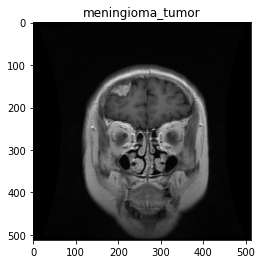

In [ ]:
#calls the function that displays a random image from the datasets
display_random_image("drive/My Drive/data","meningioma_tumor")

In [ ]:
#stores my directory to the datasets 
data_dir = "drive/My Drive/data"

#creates the training data using a 20% validation split
training_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                              validation_split = 0.2,
                                              subset = "training",
                                              batch_size = 32,
                                              image_size = (512,512),
                                              seed=66)

#creates the validation data
validation_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                              validation_split=0.2,
                                                              subset="validation",
                                                              batch_size=32,
                                                              image_size = (512,512),
                                                              seed=66)



Found 1217 files belonging to 2 classes.
Using 974 files for training.
Found 1217 files belonging to 2 classes.
Using 243 files for validation.


In [ ]:
#prints the labels of the two different class types that we are identifiying 
class_names = training_data.class_names
print(class_names)

['meningioma_tumor', 'no_tumor']


In [ ]:
#normalising the data

#the pixel data can range from 0, 256 so we are dividing the numbers by 256 to have 
#each pixel value between 0 and 1

norm_layer = tf.keras.layers.Rescaling(1/256)

training_data_norm = training_data.map(lambda x,y:(norm_layer(x),y))
validation_data_norm = validation_data.map(lambda x,y:(norm_layer(x),y))


In [ ]:
#Data augmentation 
#We do not have enough data in either datasets so we are going to augment the images to increase the amount of images within the data

data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.4),
    layers.RandomContrast(0.3),
])

In [ ]:
#Creating the model

model_1 = tf.keras.models.Sequential([
    data_augmentation,
    Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(512,512,3)),
    MaxPool2D(pool_size=2,padding="valid"),
    Conv2D(64,3,activation="relu",input_shape=(512,512,3)),
    MaxPool2D(),
    Conv2D(64,3,activation="relu",input_shape=(512,512,3)),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])


#compiling the model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fitting the model to the training data

history_1 = model_1.fit(training_data_norm,
                        epochs=50,
                        steps_per_epoch=len(training_data_norm),
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm))



Epoch 1/50
31/31 [==============================] - 16s 453ms/step - loss: 0.8267 - accuracy: 0.6407 - val_loss: 0.5899 - val_accuracy: 0.6831
Epoch 2/50
31/31 [==============================] - 15s 444ms/step - loss: 0.6061 - accuracy: 0.6756 - val_loss: 0.5532 - val_accuracy: 0.7243
Epoch 3/50
31/31 [==============================] - 15s 449ms/step - loss: 0.5978 - accuracy: 0.7043 - val_loss: 0.5644 - val_accuracy: 0.7119
Epoch 4/50
31/31 [==============================] - 15s 446ms/step - loss: 0.5818 - accuracy: 0.7064 - val_loss: 0.5444 - val_accuracy: 0.6996
Epoch 5/50
31/31 [==============================] - 15s 449ms/step - loss: 0.5636 - accuracy: 0.7084 - val_loss: 0.5134 - val_accuracy: 0.7531
Epoch 6/50
31/31 [==============================] - 15s 447ms/step - loss: 0.5698 - accuracy: 0.7187 - val_loss: 0.6866 - val_accuracy: 0.6872
Epoch 7/50
31/31 [==============================] - 15s 450ms/step - loss: 0.5767 - accuracy: 0.7207 - val_loss: 0.5336 - val_accuracy: 0.7284

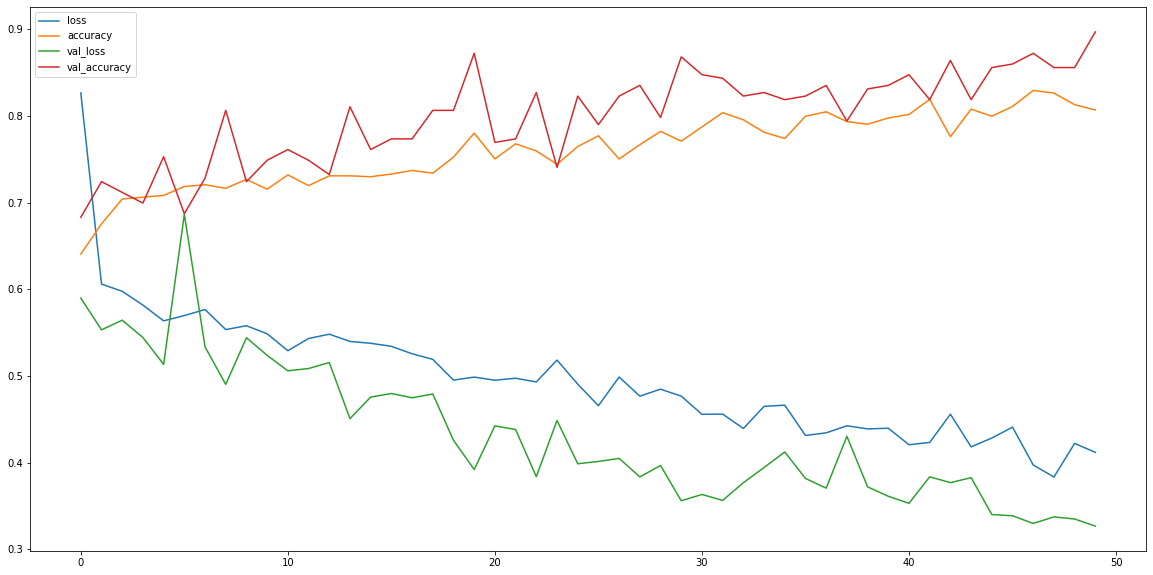

In [ ]:
#plotting the loss/accuracy to ensure my model is not overfitting to the training data
pd.DataFrame(history_1.history).plot(figsize=(20,10))

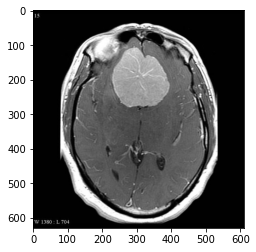

In [ ]:
#this is a random image that im going to use to test the model
tumor_img = mpimg.imread("drive/My Drive/data/meningioma#1.jpg")
plt.imshow(tumor_img)

In [ ]:
tumor_img


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
tumor_img = tf.io.read_file("drive/My Drive/data/meningioma#1.jpg")
#plt.imshow(tumor_img)
# Turn file into a tensor
tumor_img = tf.image.decode_image(tumor_img)


# Resize image
tumor_img = tf.image.resize(tumor_img, size=[512, 512])

# Normalize data
tumor_img = tumor_img / 255

tumor_img

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [ ]:
prediction = model_1.predict(tf.expand_dims(tumor_img, axis=0))
prediction

array([[0.46391183]], dtype=float32)

In [ ]:
predicted_class = class_names[int(tf.round(prediction))]
predicted_class

'meningioma_tumor'